In [1]:
""" TODO """

' TODO '

In [27]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree

%load_ext autoreload
%autoreload 2
import sys
sys.path.append("../lib_plot")
import scatter_boxplot as sp



boston = datasets.load_boston()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
boston_df_all = pd.DataFrame(boston.data, columns = boston.feature_names)
boston_df_all['MEDV'] = boston.target
boston_df_all.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [13]:
# Lets make it simple, 
# we select the target data: 
# - MEDV     Median value of owner-occupied homes in $1000's
# and we selecvt couple of categorial independent variables:
# - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
# - RAD      index of accessibility to radial highways
boston_df = boston_df_all[["MEDV", "AGE", "PTRATIO"]]

In [14]:
# for the shake of the exercise here, lets make the target categorial, if >25 (.75 percentile) True else false
# True for expensive
CUT = 25
boston_df["MEDV_cat"] = boston_df_target.apply(lambda x: True if x < CUT else False)

/Users/charilaostsarouchas/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [17]:
boston_df.head(2)

,MEDV,AGE,PTRATIO,MEDV_cat
0,24.0,65.2,15.3,True
1,21.6,78.9,17.8,True


## Create and Fit the Tree

In [117]:
X = boston_df[["AGE", "PTRATIO"]]
y = boston_df["MEDV_cat"]
clf = tree.DecisionTreeClassifier(max_depth=2)
#clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

## Important information of decision tree results

In [118]:
print "names: ", X.columns.values
print "importances: ", clf.feature_importances_

names:  ['AGE' 'PTRATIO']
importances:  [ 0.08781231  0.91218769]


##See the decision boundaries

In [119]:
# See visualy the results

In [120]:
a_df = boston_df[boston_df["MEDV_cat"] == True]
a_x = a_df["AGE"].values
a_y = a_df["PTRATIO"].values
b_df = boston_df[boston_df["MEDV_cat"] == False]
b_x = b_df["AGE"].values
b_y = b_df["PTRATIO"].values

In [121]:
feature_names = X.columns.values
print clf.tree_.children_left
print clf.tree_.children_right
print clf.tree_.threshold
print clf.tree_.feature
print [feature_names[i] for i in clf.tree_.feature]

[ 1  2 -1 -1  5 -1 -1]
[ 4  3 -1 -1  6 -1 -1]
[ 18.34999847  14.54999924  -2.          -2.          72.30000305  -2.          -2.        ]
[ 1  1 -2 -2  0 -2 -2]
['PTRATIO', 'PTRATIO', 'AGE', 'AGE', 'AGE', 'AGE', 'AGE']


In [122]:
# extract of the underlying decision-rules from a trained tree
# http://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_code(tree, feature_names):
        left      = tree.tree_.children_left
        right     = tree.tree_.children_right
        threshold = tree.tree_.threshold
        features  = [feature_names[i] for i in tree.tree_.feature]
        value = tree.tree_.value

        def recurse(left, right, threshold, features, node):
                if (threshold[node] != -2):
                        print "if ( " + features[node] + " <= " + str(threshold[node]) + " ) {"
                        if left[node] != -1:
                                recurse (left, right, threshold, features,left[node])
                        print "} else {"
                        if right[node] != -1:
                                recurse (left, right, threshold, features,right[node])
                        print "}"
                else:
                        print "return " + str(value[node])

        recurse(left, right, threshold, features, 0)
        

In [123]:
get_code(clf, X.columns.values)

if ( PTRATIO <= 18.3499984741 ) {
if ( PTRATIO <= 14.5499992371 ) {
return [[ 16.   1.]]
} else {
return [[  80.  101.]]
}
} else {
if ( AGE <= 72.3000030518 ) {
return [[ 25.  88.]]
} else {
return [[  11.  184.]]
}
}


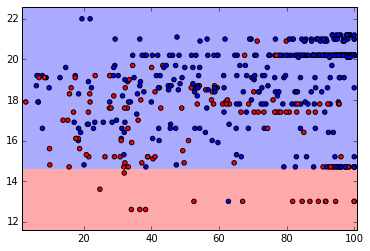

In [124]:
 # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

#!!! check next value - should not be too small for the range we have - better dynamically
h = 1  # step size in the mesh

x_min, x_max = X["AGE"].min() - 1, X["AGE"].max() + 1
y_min, y_max = X["PTRATIO"].min() - 1, X["PTRATIO"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X["AGE"], X["PTRATIO"], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#plt.title("3-Class classification (k = %i, weights = '%s')"
#              % (n_neighbors, weights))
plt.show()

